In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras import callbacks
from keras.callbacks import ModelCheckpoint

warnings.filterwarnings("ignore")

<ipython-input-1-0c3cbbee4fd9>:26: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


<IPython.core.display.Javascript object>

### Loading The Dataset

In [2]:
Data = pd.read_csv("Churn.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

<IPython.core.display.Javascript object>

- This dataset has 10,000 rows and 14 columns

### Data Overview

In [4]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<IPython.core.display.Javascript object>

In [5]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<IPython.core.display.Javascript object>

In [6]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

- There are 10,000  observations and 14 columns in the data.
- 3 columns are of the object datatype and 11 columns are numerical.

In [7]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplicates in the data.

In [8]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

<IPython.core.display.Javascript object>

- No missing values in this data

In [9]:
pd.options.display.float_format = "{:.2f}".format

# This allows me to see the dataframe in my next step without scientific notation.

<IPython.core.display.Javascript object>

In [10]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


<IPython.core.display.Javascript object>

In [11]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Morin       1
Hanna       1
Reppert     1
Pettit      1
Estes       1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

- I will choose to drop Row Number, and Customer Id columns due to not providing any meaningful value to a future model.
- I am also involving Surname, since dealing with thousands of last names will be difficult for a model as well. 

In [13]:
Data.drop(["RowNumber"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
Data.drop(["CustomerId"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [15]:
Data.drop(["Surname"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### EDA - Univariate Analysis

- In this scenario, our target variable is 'Exited' so we need to find out whether these classes are balanced or not. I will be discovering this below.

In [16]:
Data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<IPython.core.display.Javascript object>

- Our target variable is not in balance. There are many more customers who stayed with the bank then those who did not. There are a couple things we can do with our data to help with this, I will go into more detail on this later. 

In [17]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [18]:
Data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<IPython.core.display.Javascript object>

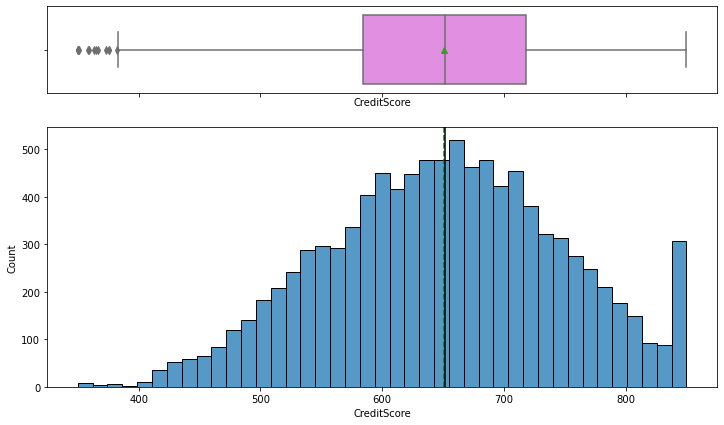

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(Data, "CreditScore")

- There are some outliers in credit score in the low end to the left. Other than that this is close to a normal distribution.

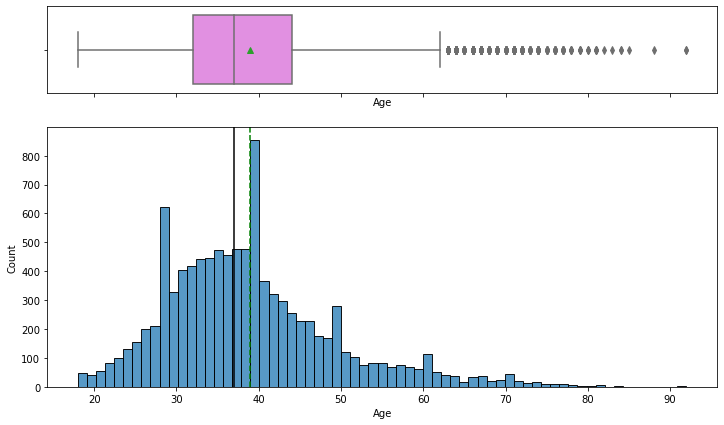

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(Data, "Age")

- There are quite a few outliers in age on the older side, may want to consider removing these. Pretty normal distribution otherwise.

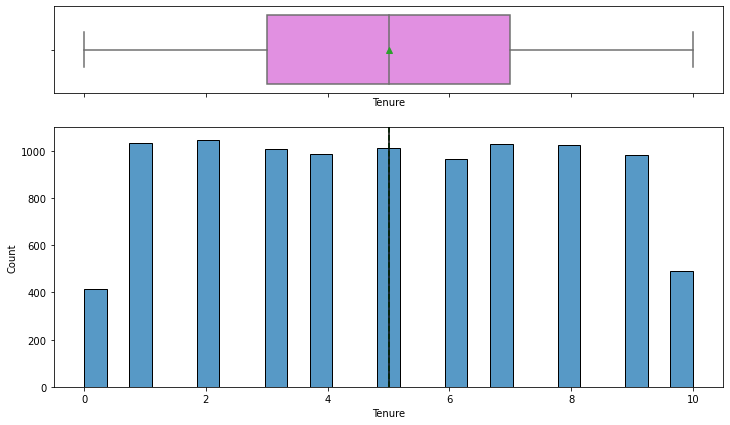

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(Data, "Tenure")

- Tenure has a more uniform distribution

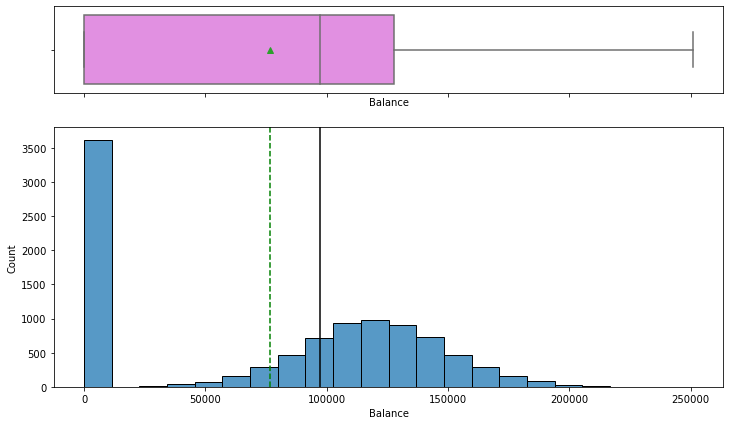

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(Data, "Balance")

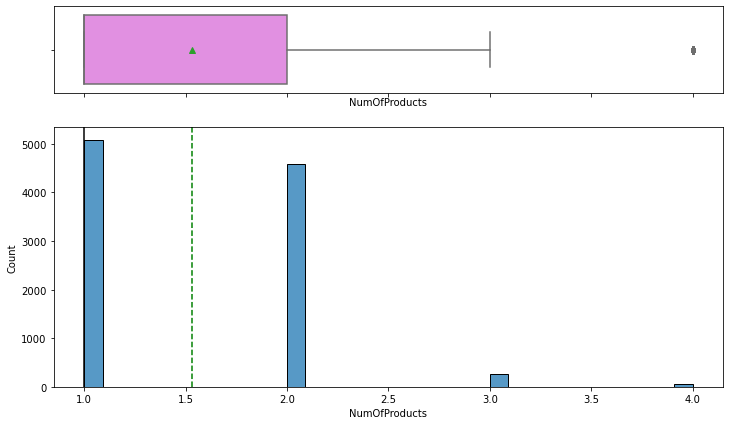

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(Data, "NumOfProducts")

- Customers tend to have fewer products. Customers with 4 products are an outlier.

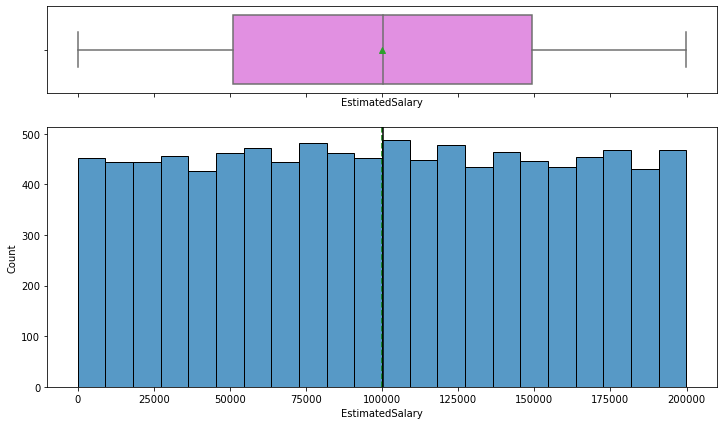

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(Data, "EstimatedSalary")

- Estimated Salary has a very uniform distribution.

In [25]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

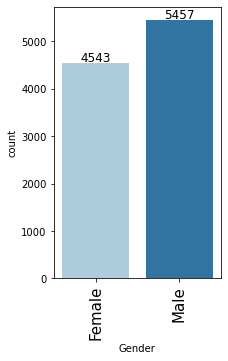

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(Data, "Gender")

- More males than females, but not by an overwhelming amount. 

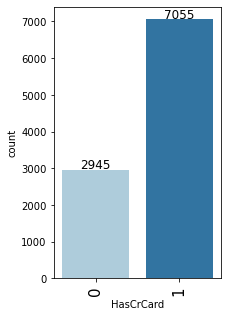

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(Data, "HasCrCard")

- Way more people have a credit card, roughly 4000 more customers have one then do not.

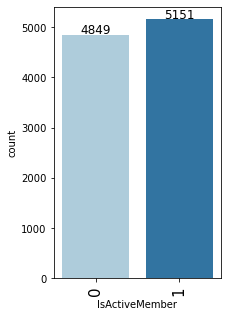

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(Data, "IsActiveMember")

- This is very balanced, it seems roughly half of the 10000 customers are not active. These would typically be customers who would potentially leave.

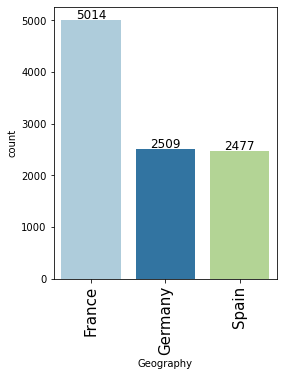

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(Data, "Geography")

- Twice as many customers in France as there are in Germany or Spain. 

0    7963
1    2037
Name: Exited, dtype: int64


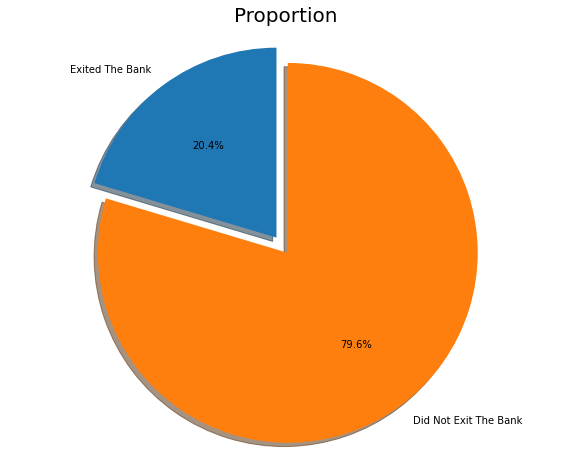

<IPython.core.display.Javascript object>

In [30]:
print(Data.Exited.value_counts())
labels = "Exited The Bank", "Did Not Exit The Bank"
# sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [
    Data.Exited[Data["Exited"] == 1].count(),
    Data.Exited[Data["Exited"] == 0].count(),
]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")
plt.title("Proportion", size=20)
plt.show()

- This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
- Only ~20% of the customers have left the bank 
- Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

In [31]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

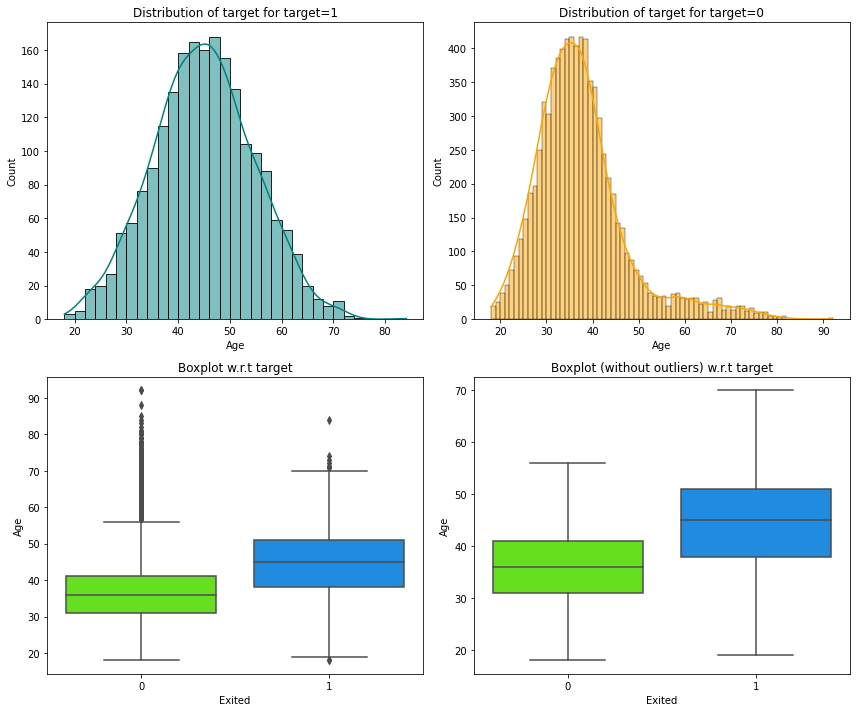

<IPython.core.display.Javascript object>

In [32]:
distribution_plot_wrt_target(Data, "Age", "Exited")

- It seems that of customers who left the bank, many of them seem to be older than the ones who stayed. The median age for those who left is about 10 years older than the customers who stayed.

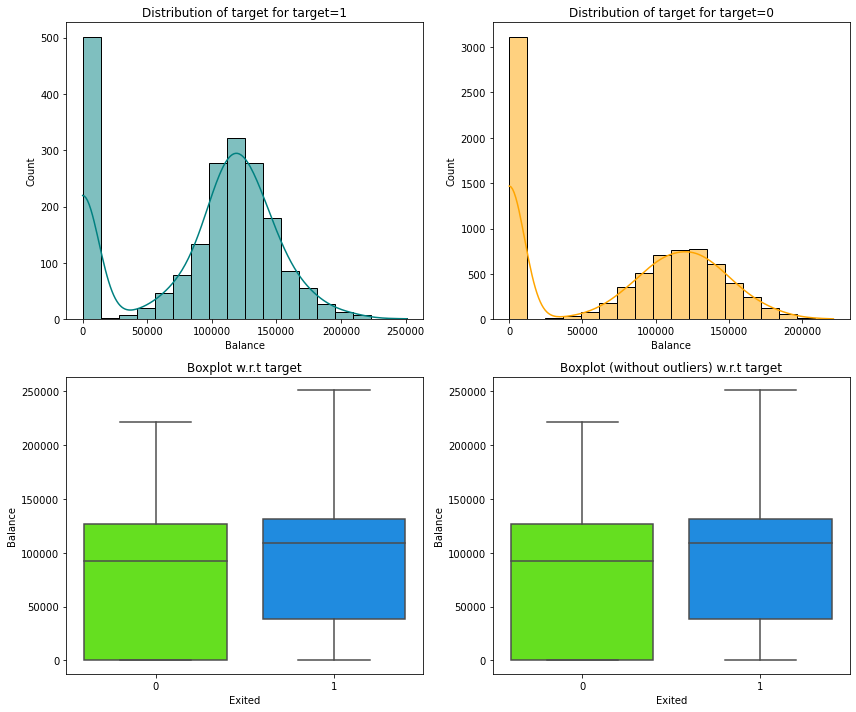

<IPython.core.display.Javascript object>

In [33]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

- It seems that people who left the bank have a slightly higher balance, although there are many customers with a 0 balance which clearly affects this distribution. The median balance of customers who left is about 20k larger than customers who stay. The bank definitely does not want losing customers which high balances. 

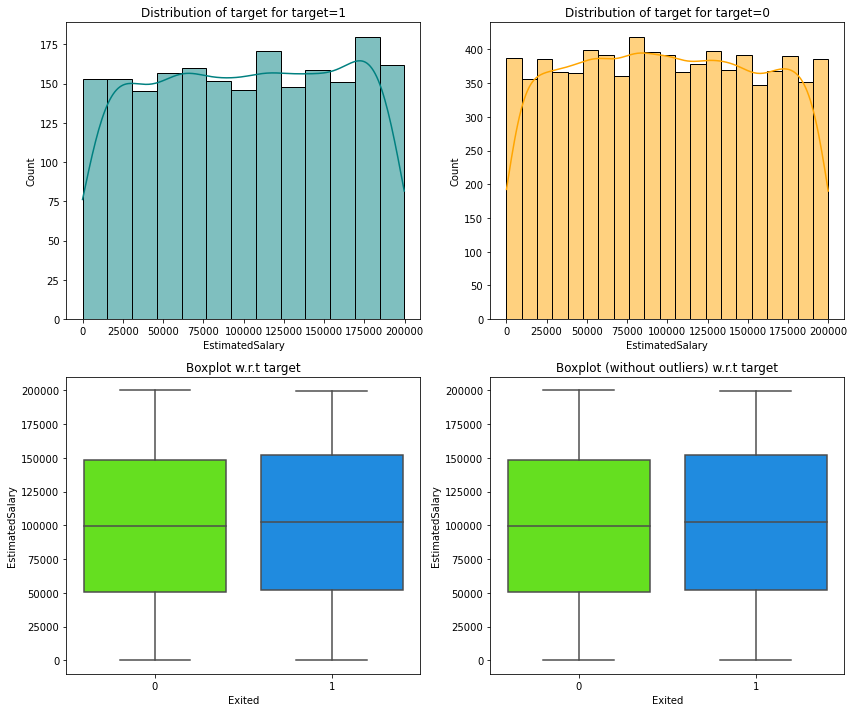

<IPython.core.display.Javascript object>

In [34]:
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

- Estimated Salary seems to make no difference on the target variable, as a uniform distribution is present in both classes of our target variable. Could potentially be dropped due to having no value in a future model.

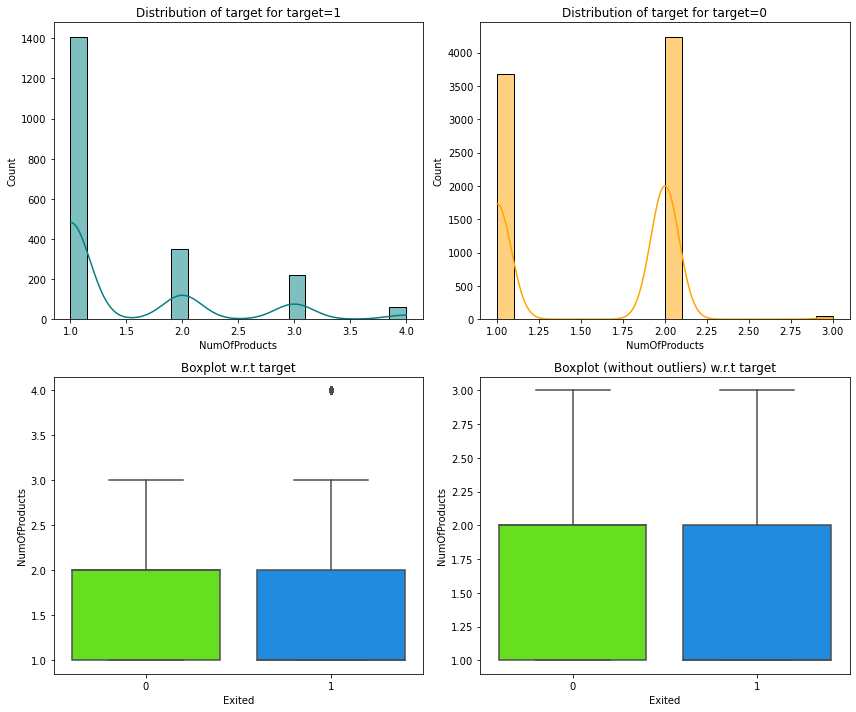

<IPython.core.display.Javascript object>

In [35]:
distribution_plot_wrt_target(Data, "NumOfProducts", "Exited")

- It seems that the only people with 4 products all left the bank. For that reason alone I want this variable to be in the model and not drop. I believe that could add value to the model.

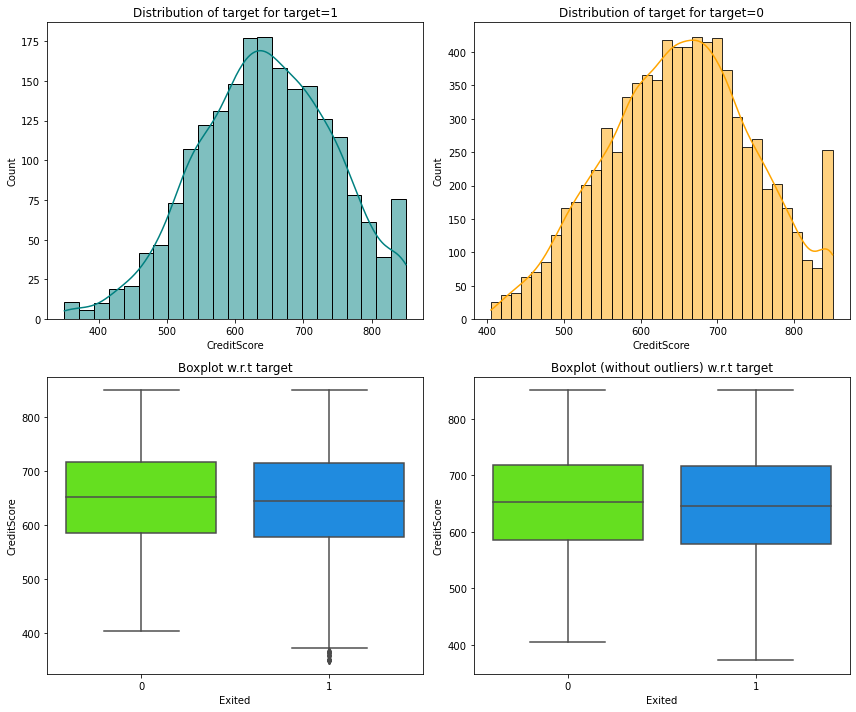

<IPython.core.display.Javascript object>

In [36]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

- Credit Score seems to not have a large affect on our target variable either. I believe this variable could be dropped due to the fact that the same relative distribution is present in both classes of our target variable. 

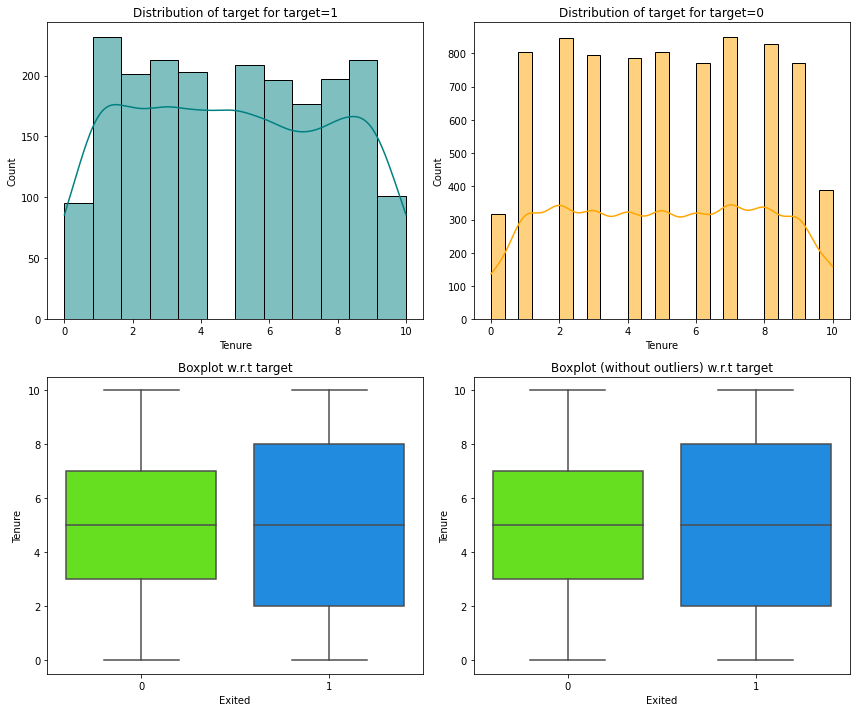

<IPython.core.display.Javascript object>

In [37]:
distribution_plot_wrt_target(Data, "Tenure", "Exited")

- It seems of those who stayed with the bank, they had a much more compacted number of years. However, all years of tenure are represented in both categories of our target variable, with a uniform distribution. I believe this variable can be dropped as well. If it is not impacting the target variable then it will not be adding value to the model.

In [38]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


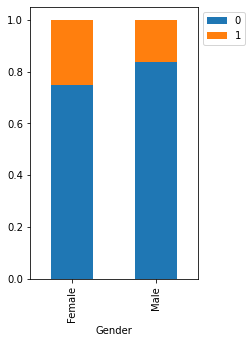

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(Data, "Gender", "Exited")

- Almost twice as many females left the bank than males. 

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


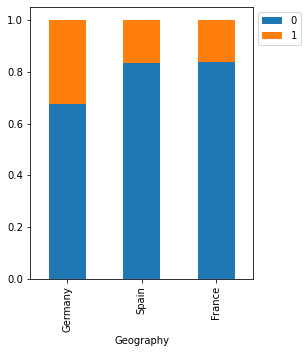

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(Data, "Geography", "Exited")

- Germany had twice as many customers leave the bank as both France and Spain. 

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


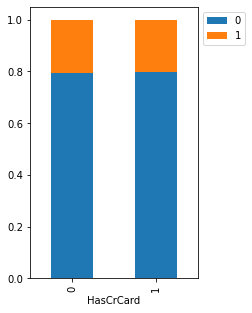

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(Data, "HasCrCard", "Exited")

- Slightly more customers without credit cards left the bank than those who do have credit cards.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


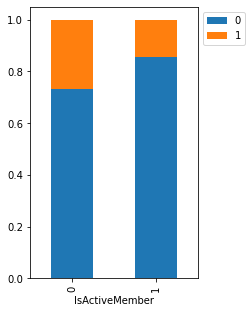

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(Data, "IsActiveMember", "Exited")

- I could have predicted this, but many more customers who are inactive left the bank. 

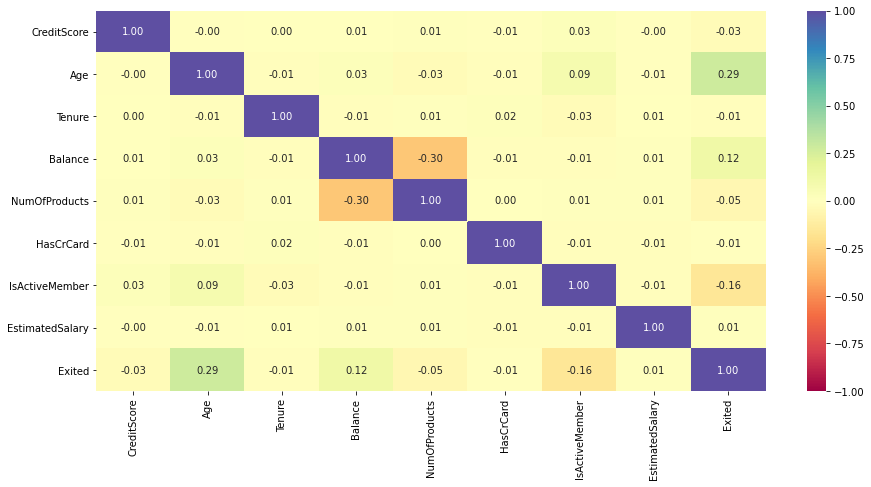

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(Data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Age and our target variable have a positive relationship, although it is not too worrying. This was expected. 
- Number of Products and Balance have a negative relationship, but it is not worrying.
- IsActiveMember and our target has a negative relationship, which was expected.
- Other than these variables, all others are very independent of one another, and of the target variable as well, which is a good thing.

- Overall a few things have caught my eye as being potentially important for this analysis...

- There are a surprising amount of customers from Germany leaving the bank, which is strange considering France has twice the number of customers that Spain and Germany have in general, but Germany had almost twice as many customers who left as France and Spain. 
- Age seems to play a rather important role. Older customers are leaving the bank more often. Older customers are usually ones who tend to have more assets as well, which means this is not good. 
- Many more females leave the bank than men. This is strange because there are more men present in the dataset, one would assume naturally that more men would leave a bank in this case just based off numbers alone. 

- We have three variables that may potentially add little to no value and introduce too much noise into our model. These variables are Tenure, CreditScore, and EstimatedSalary. For this reason, I will be dropping them from the dataset as well. 

In [44]:
Data.drop(["Tenure"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [45]:
Data.drop(["CreditScore"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [46]:
Data.drop(["EstimatedSalary"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [47]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geography       10000 non-null  object 
 1   Gender          10000 non-null  object 
 2   Age             10000 non-null  int64  
 3   Balance         10000 non-null  float64
 4   NumOfProducts   10000 non-null  int64  
 5   HasCrCard       10000 non-null  int64  
 6   IsActiveMember  10000 non-null  int64  
 7   Exited          10000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


<IPython.core.display.Javascript object>

- This seems like the correct amount of variables to go ahead and move forward with my modeling. First I will need to split my data and then preprocess it - which will include encoding my categorical variables (Geography and Gender) so that the model will run them.

### Data Preparation for Modeling

In [48]:
bank = Data.copy()

<IPython.core.display.Javascript object>

In [49]:
X = bank.drop(columns="Exited")
X = pd.get_dummies(X)
Y = bank["Exited"]

<IPython.core.display.Javascript object>

In [50]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=14, stratify=Y
)

<IPython.core.display.Javascript object>

In [51]:
# scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [52]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


<IPython.core.display.Javascript object>

### Model 1

In [53]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [54]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation="relu", input_dim=10, units=64))
# Add 1st hidden layer
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [55]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [57]:
history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1
)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.5702 - accuracy: 0.7513 - val_loss: 0.5163 - val_accuracy: 0.7862
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7987 - val_loss: 0.4811 - val_accuracy: 0.7862
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7989 - val_loss: 0.4606 - val_accuracy: 0.7875
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8003 - val_loss: 0.4457 - val_accuracy: 0.7906
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8052 - val_loss: 0.4353 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8094 - val_loss: 0.4286 - val_accuracy: 0.8087
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8159 - val_loss: 0.4229 - val_accuracy: 0.8175
Epoch 

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8575


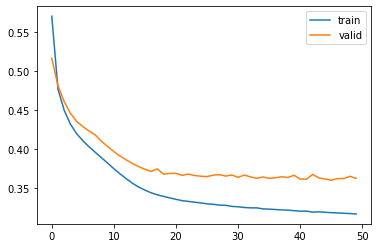

<IPython.core.display.Javascript object>

In [58]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = model.evaluate(X_test, y_test)

- From this, I can tell that my model is overfitting the training data. I would like to now check other metrics as well.

In [59]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

<IPython.core.display.Javascript object>

In [60]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

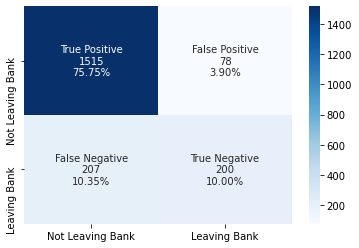

<IPython.core.display.Javascript object>

In [61]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

In [62]:
# Accuracy as per the classification report
from sklearn import metrics

cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.49      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



<IPython.core.display.Javascript object>

- As you can see, the above model has a pretty good accuracy and weighted recall score (but is very imbalanced between classes which is bad). This is due to the imbalanced dataset, and may not nessesarily represent a good model.  

- Imbalanced dataset: As you have seen in the EDA, this dataset is imbalanced, and it contains many more examples that belong to the 0 class.

- Decision Threshold: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction. The ROC-AUC threshhold will hopefully balance out our metrics a bit.

- Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

- In this problem's situation, Recall is very important, and will be the metric we focus on. We do not want to be predicting that people won't leave the bank, but then they actually do. I will be improving the recall score of my models continuing this analysis through various techniques. 

### Model 2

In [63]:
backend.clear_session()
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [64]:
model1 = Sequential()
# Adding the hidden and output layers
model1.add(
    Dense(
        64,
        activation="relu",
        kernel_initializer="he_uniform",
        input_dim=X_train.shape[1],
    )
)
model1.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model1.add(Dense(16, activation="relu", kernel_initializer="he_uniform"))
model1.add(Dense(1, activation="sigmoid"))
# Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.0001)
model1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [65]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [66]:
history1 = model1.fit(
    X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.2
)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.8347 - accuracy: 0.5117 - val_loss: 0.6952 - val_accuracy: 0.6319
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7280 - val_loss: 0.5800 - val_accuracy: 0.7681
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7858 - val_loss: 0.5281 - val_accuracy: 0.7800
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7983 - val_loss: 0.4993 - val_accuracy: 0.7875
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7997 - val_loss: 0.4810 - val_accuracy: 0.7862
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8012 - val_loss: 0.4687 - val_accuracy: 0.7919
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8067 - val_loss: 0.4598 - val_accuracy: 0.7969
Epoch 

<IPython.core.display.Javascript object>

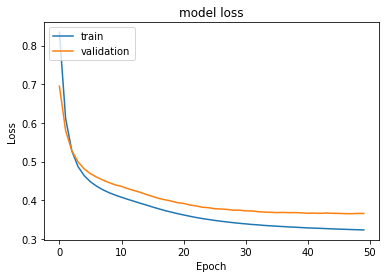

<IPython.core.display.Javascript object>

In [67]:
# Plotting Train Loss vs Validation Loss
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

- This model looks much nicer, one we could most likely make better using dropout and other techniques. Time to look at the ROC curve of the model.

Best Threshold=0.212539, G-Mean=0.763


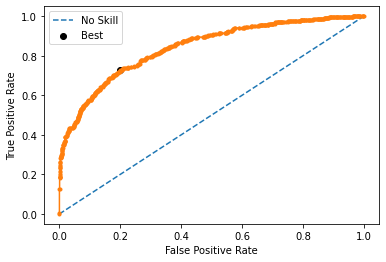

<IPython.core.display.Javascript object>

In [68]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [69]:
# Predicting the results using best as a threshold
y_pred_e1 = model1.predict(X_test)
y_pred_e1 = y_pred_e1 > thresholds1[ix]
y_pred_e1

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

<IPython.core.display.Javascript object>

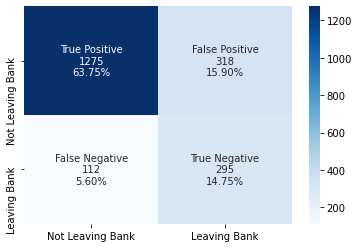

<IPython.core.display.Javascript object>

In [70]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_e1)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm1, group_names=labels, categories=categories, cmap="Blues")

In [71]:
# Accuracy as per the classification report
from sklearn import metrics

cr = metrics.classification_report(y_test, y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



<IPython.core.display.Javascript object>

- This model is pretty well performing in terms of recall score and the model loss plot. I would like to see a more balanced recall score between the classes.

### Model 3

In [72]:
backend.clear_session()
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [73]:
model2 = Sequential()
model2.add(Dense(128, activation="relu", input_dim=X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model2.add(BatchNormalization())
model2.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model2.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [74]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

<IPython.core.display.Javascript object>

In [75]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [76]:
history_2 = model2.fit(
    X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.2
)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8263 - val_loss: 0.4856 - val_accuracy: 0.8338
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8533 - val_loss: 0.4099 - val_accuracy: 0.8487
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8589 - val_loss: 0.3717 - val_accuracy: 0.8550
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8627 - val_loss: 0.3692 - val_accuracy: 0.8475
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8628 - val_loss: 0.3714 - val_accuracy: 0.8506
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8642 - val_loss: 0.3690 - val_accuracy: 0.8500
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8661 - val_loss: 0.3693 - val_accuracy: 0.8531
Epoch 

<IPython.core.display.Javascript object>

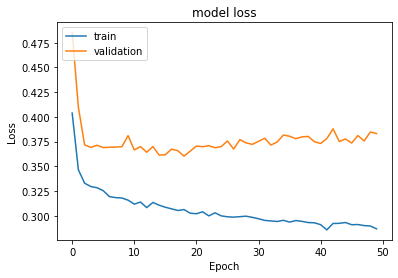

<IPython.core.display.Javascript object>

In [77]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

- Unfortunately, from the above plot we observe that there is noise in the model, and it and seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.170524, G-Mean=0.766


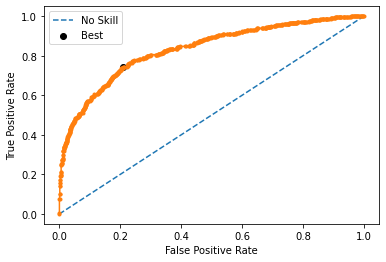

<IPython.core.display.Javascript object>

In [78]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [79]:
y_pred_e2 = model2.predict(X_test)
y_pred_e2 = y_pred_e2 > thresholds2[ix]
y_pred_e2

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

<IPython.core.display.Javascript object>

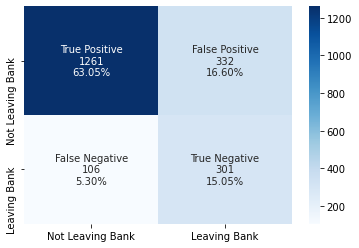

<IPython.core.display.Javascript object>

In [80]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_e2)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

In [81]:
# Accuracy as per the classification report
from sklearn import metrics

cr2 = metrics.classification_report(y_test, y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



<IPython.core.display.Javascript object>

- Model is overfitting very badly. Not a bad recall score but the recall score means nothing if I can't get the model to fit the test data better.

### Model 4

In [82]:
backend.clear_session()
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [83]:
model3 = Sequential()
model3.add(Dense(256, activation="relu", input_dim=X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [84]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

<IPython.core.display.Javascript object>

In [85]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [86]:
history_3 = model3.fit(
    X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.2
)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.4581 - accuracy: 0.7989 - val_loss: 0.4230 - val_accuracy: 0.8300
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8366 - val_loss: 0.3679 - val_accuracy: 0.8531
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8484 - val_loss: 0.3598 - val_accuracy: 0.8637
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8569 - val_loss: 0.3597 - val_accuracy: 0.8625
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8556 - val_loss: 0.3618 - val_accuracy: 0.8550
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8605 - val_loss: 0.3614 - val_accuracy: 0.8550
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8587 - val_loss: 0.3573 - val_accuracy: 0.8575
Epoch 

<IPython.core.display.Javascript object>

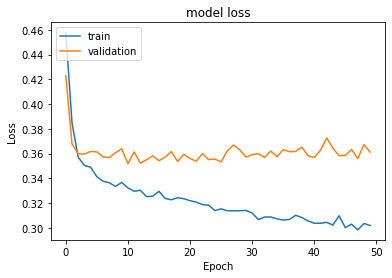

<IPython.core.display.Javascript object>

In [87]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

- Again, not exactly the result I am looking for.

Best Threshold=0.175068, G-Mean=0.771


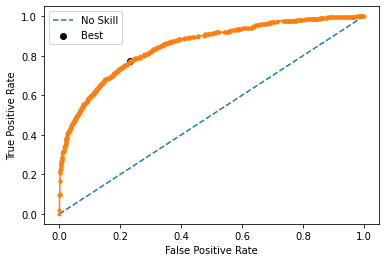

<IPython.core.display.Javascript object>

In [88]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [89]:
y_pred_e3 = model3.predict(X_test)
y_pred_e3 = y_pred_e3 > thresholds3[ix]
y_pred_e3

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

<IPython.core.display.Javascript object>

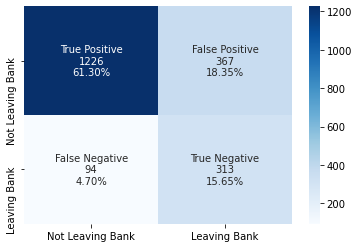

<IPython.core.display.Javascript object>

In [90]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_e3)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm3, group_names=labels, categories=categories, cmap="Blues")

In [91]:
# Accuracy as per the classification report
from sklearn import metrics

cr3 = metrics.classification_report(y_test, y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.77      0.58       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



<IPython.core.display.Javascript object>

- The recall score in this model is consistant which is good, but the model is terribly overfitting as seen in the model loss plot. I will need to focus on this as well as my recall score.

### Model 5

- I will be using RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

In [92]:
backend.clear_session()
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [93]:
def create_model_v4(lr, batch_size):
    np.random.seed(2022)
    model = Sequential()
    model.add(Dense(256, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    # compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

<IPython.core.display.Javascript object>

In [94]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    "batch_size": [32, 64, 128],
    "lr": [0.01, 0.1, 0.001],
}

kfold_splits = 3
random = RandomizedSearchCV(
    estimator=keras_estimator,
    verbose=1,
    cv=kfold_splits,
    param_distributions=param_random,
    n_jobs=-1,
)

<IPython.core.display.Javascript object>

In [95]:
random_result = random.fit(X_train, y_train, validation_split=0.2, verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_["mean_test_score"]
stds = random_result.cv_results_["std_test_score"]
params = random_result.cv_results_["params"]

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8181 - val_loss: 0.3843 - val_accuracy: 0.8512
Best: 0.841875 using {'lr': 0.01, 'batch_size': 32}


<IPython.core.display.Javascript object>

- {'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [96]:
estimator_v4 = create_model_v4(
    batch_size=random_result.best_params_["batch_size"],
    lr=random_result.best_params_["lr"],
)

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

<IPython.core.display.Javascript object>

In [97]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_["lr"])
estimator_v4.compile(
    loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
history_4 = estimator_v4.fit(
    X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_split=0.2
)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.4309 - accuracy: 0.8155 - val_loss: 0.3959 - val_accuracy: 0.8487
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8442 - val_loss: 0.3680 - val_accuracy: 0.8544
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8487 - val_loss: 0.3734 - val_accuracy: 0.8444
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8523 - val_loss: 0.3655 - val_accuracy: 0.8556
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8489 - val_loss: 0.3695 - val_accuracy: 0.8537
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8525 - val_loss: 0.3602 - val_accuracy: 0.8600
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8572 - val_loss: 0.3570 - val_accuracy: 0.8600
Epoch 

<IPython.core.display.Javascript object>

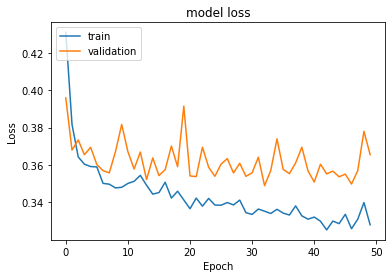

<IPython.core.display.Javascript object>

In [98]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_4.history["loss"])
plt.plot(history_4.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

- There is noise in the validation loss.

Best Threshold=0.153208, G-Mean=0.777


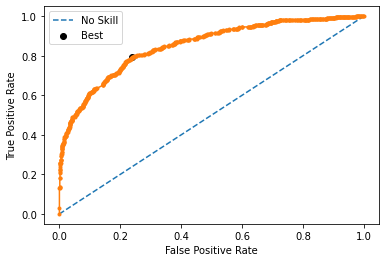

<IPython.core.display.Javascript object>

In [99]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [100]:
y_pred_e4 = estimator_v4.predict(X_test)
y_pred_e4 = y_pred_e4 > thresholds4[ix]
y_pred_e4

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

<IPython.core.display.Javascript object>

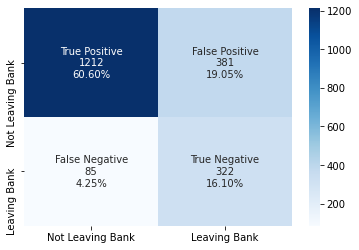

<IPython.core.display.Javascript object>

In [101]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred_e4)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm4, group_names=labels, categories=categories, cmap="Blues")

In [102]:
# Accuracy as per the classification report
from sklearn import metrics

cr4 = metrics.classification_report(y_test, y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.46      0.79      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.77      0.79      2000



<IPython.core.display.Javascript object>

- Model was no better than the ones before it in terms of weighted F1. I will now use gridsearch cv to see if I can get a better result. Since randomsearch will return random hyperparameters, it is not surprising that the optimal F1 was not achieved. 

### Model 6

- My best models which I will now attempt to optimize was Models 1 & 2. I will do multiple things to my network to try and get the most optimized model that I can. I will include using callback as well, something I have not tried before. I will also use different kernal initialzers. 

In [103]:
backend.clear_session()
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [104]:
model6 = Sequential()
# Adding the hidden and output layers
model6.add(
    Dense(
        64,
        activation="relu",
        kernel_initializer="he_uniform",
        input_dim=X_train.shape[1],
    )
)
model6.add(BatchNormalization())
model6.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model6.add(Dropout(0.20))
model6.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model6.add(Dropout(0.10))
model6.add(Dense(16, activation="relu", kernel_initializer="he_uniform"))
model6.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [105]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

<IPython.core.display.Javascript object>

In [106]:
model6.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5)
history_6 = model6.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=es_cb
)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7655 - val_loss: 0.4509 - val_accuracy: 0.8015
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7933 - val_loss: 0.4279 - val_accuracy: 0.8070
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8029 - val_loss: 0.4160 - val_accuracy: 0.8115
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8065 - val_loss: 0.4065 - val_accuracy: 0.8165
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8140 - val_loss: 0.3993 - val_accuracy: 0.8220
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8215 - val_loss: 0.3928 - val_accuracy: 0.8290
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8202 - val_loss: 0.3856 - val_accuracy: 0.8400
Epoch 

<IPython.core.display.Javascript object>

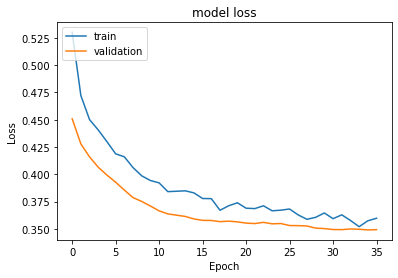

<IPython.core.display.Javascript object>

In [107]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_6.history["loss"])
plt.plot(history_6.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

Best Threshold=0.224427, G-Mean=0.773


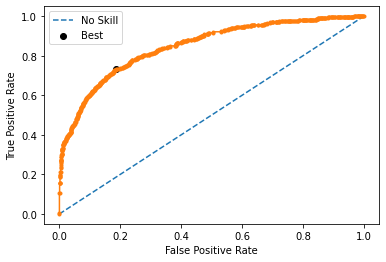

<IPython.core.display.Javascript object>

In [108]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat6 = model6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_test, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [109]:
y_pred_e6 = model6.predict(X_test)
y_pred_e6 = y_pred_e6 > thresholds6[ix]
y_pred_e6

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

<IPython.core.display.Javascript object>

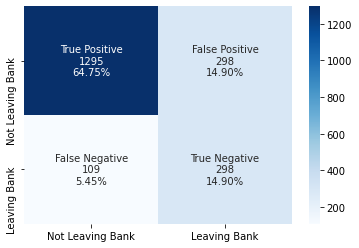

<IPython.core.display.Javascript object>

In [110]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm6 = confusion_matrix(y_test, y_pred_e6)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm6, group_names=labels, categories=categories, cmap="Blues")

In [111]:
# Accuracy as per the classification report
from sklearn import metrics

cr6 = metrics.classification_report(y_test, y_pred_e6)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.73      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



<IPython.core.display.Javascript object>

- This model seems to be my best so far. While the F1 score is not as high, validation loss seems to be the best and it makes sense that the training loss is the way it is. As I introduce more complexity to the model, more noise is introduced, which affects the performance of the training. I wil try to further improve this model as my final model, as it seems to be giving me the most consistant results. I believe callback helps as well. This model does produce a high amount of false negatives, but as long as we can limit those a bit I believe our F1 score will improve.

### Model 7

- I will be increasing the size of my test set for this model to see if anything works out. I will also be using Adam as a optimizer as well as utilizing most of the tools I have tried in my other 6 models.

In [112]:
bank1 = Data.copy()

<IPython.core.display.Javascript object>

In [113]:
X = bank1.drop(columns="Exited")
X = pd.get_dummies(X)
Y = bank1["Exited"]

<IPython.core.display.Javascript object>

In [114]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=14, stratify=Y
)

<IPython.core.display.Javascript object>

In [115]:
# scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [116]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


<IPython.core.display.Javascript object>

In [117]:
backend.clear_session()
np.random.seed(14)
import random

random.seed(14)
tf.random.set_seed(14)

<IPython.core.display.Javascript object>

In [118]:
model7 = Sequential()
# Adding the hidden and output layers
model7.add(
    Dense(
        64,
        activation="relu",
        kernel_initializer="he_uniform",
        input_dim=X_train.shape[1],
    )
)
model7.add(BatchNormalization())
model7.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model7.add(Dropout(0.25))
model7.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model7.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model7.add(Dropout(0.10))
model7.add(Dense(16, activation="relu", kernel_initializer="he_uniform"))
model7.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [119]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                        

<IPython.core.display.Javascript object>

In [120]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5)
history_7 = model7.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=es_cb
)

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5453 - accuracy: 0.7641 - val_loss: 0.4077 - val_accuracy: 0.8180
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8264 - val_loss: 0.3696 - val_accuracy: 0.8453
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8416 - val_loss: 0.3565 - val_accuracy: 0.8490
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8484 - val_loss: 0.3557 - val_accuracy: 0.8497
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8486 - val_loss: 0.3563 - val_accuracy: 0.8540
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8556 - val_loss: 0.3539 - val_accuracy: 0.8560
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8517 - val_loss: 0.3566 - val_accuracy: 0.8523
Epoch 

<IPython.core.display.Javascript object>

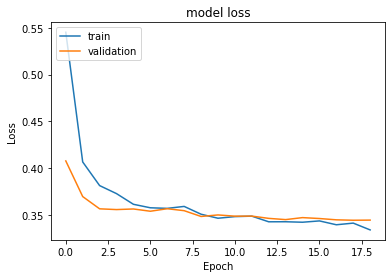

<IPython.core.display.Javascript object>

In [121]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_7.history["loss"])
plt.plot(history_7.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

Best Threshold=0.195640, G-Mean=0.775


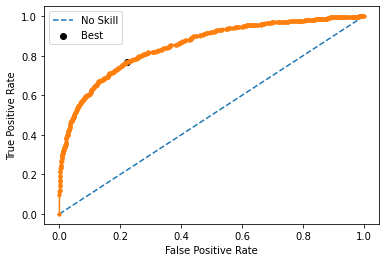

<IPython.core.display.Javascript object>

In [122]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [123]:
y_pred_e7 = model7.predict(X_test)
y_pred_e7 = y_pred_e7 > thresholds7[ix]
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

<IPython.core.display.Javascript object>

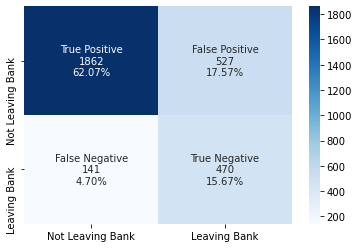

<IPython.core.display.Javascript object>

In [124]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

cm7 = confusion_matrix(y_test, y_pred_e7)
labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
categories = ["Not Leaving Bank", "Leaving Bank"]
make_confusion_matrix(cm7, group_names=labels, categories=categories, cmap="Blues")

In [125]:
# Accuracy as per the classification report
from sklearn import metrics

cr7 = metrics.classification_report(y_test, y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2389
           1       0.47      0.77      0.58       611

    accuracy                           0.78      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.78      0.79      3000



<IPython.core.display.Javascript object>

### Conclusion/Business Recommendations

- Model 7 (just above) will be my final model and the one that I would propose to a marketing team. For this model, I utilized batch normalization, dropout, different quanity of hidden layers and nodes within those layers, callbacks, and Adam as my optimizer. After many tries, I believe I have a model that will do reletively well. 

- Recall was our goal metric, and I have managed to get the recall score on both classes of our target variable to almost exactly the same value. I tried many different models and attempts to raise the recall score, but I believe using the ROC-AUC threshold (while balancing the data out) limits the capabilities of how high recall could actually go in this model. I think that manually adjusting the threshhold would allow us to almost "fudge" the numbers a bit in terms of our metrics, but that was not the goal of this assignment. 

- We can see from the model loss plot that this model is neither overfitting or underfitting, which is why I belive it represents the data very well. Both training loss and validation loss are on top of one another. 

- The bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether a customer is likely to exit the bank or not, and this process seems to be easier and more time-efficient than other methods or machine learning models which could predict the same result.